In [3]:
!pip install thefuzz

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.4/3.4 MB 1.2 MB/s eta 0:00:0000:0100:010m


In [4]:
import itertools
import pandas as pd

from thefuzz import fuzz, process 


In [33]:
df1 = pd.read_csv("Company Names.csv").head(300)[["Company Name"]]
df2 = pd.read_csv("companies_sorted.csv").head(400)[["name"]]

In [34]:
df1.head()

,Company Name
0,TCS
1,Accenture
2,ICICI Bank
3,Cognizant
4,HDFC Bank


In [35]:
df2.head()

,name
0,ibm
1,tata consultancy services
2,accenture
3,us army
4,ey


In [36]:
df = pd.DataFrame(
    itertools.product(df1['Company Name'].values, df2['name'].values),
    columns = ["CSV 1", "CSV 2"]
)

In [37]:
df.head()

,CSV 1,CSV 2
0,TCS,ibm
1,TCS,tata consultancy services
2,TCS,accenture
3,TCS,us army
4,TCS,ey


In [38]:
df.shape

(120000, 2)

In [45]:
fuzz.partial_ratio("Apple", "Apple Inc.")

100

In [46]:
score = [fuzz.partial_ratio(c1, c2) for c1, c2 in df.values]

In [48]:
score[1090:3000000]

[22,
 17,
 15,
 15,
 40,
 53,
 36,
 20,
 0,
 18,
 20,
 25,
 25,
 30,
 27,
 25,
 24,
 22,
 27,
 33,
 22,
 22,
 50,
 40,
 24,
 0,
 27,
 33,
 22,
 22,
 18,
 40,
 30,
 36,
 0,
 22,
 40,
 22,
 40,
 25,
 27,
 33,
 31,
 22,
 30,
 25,
 29,
 35,
 25,
 29,
 32,
 35,
 25,
 20,
 30,
 25,
 43,
 33,
 21,
 0,
 30,
 20,
 29,
 0,
 25,
 33,
 44,
 29,
 13,
 21,
 32,
 27,
 30,
 40,
 0,
 29,
 29,
 30,
 22,
 0,
 27,
 25,
 22,
 30,
 30,
 22,
 20,
 27,
 31,
 55,
 25,
 25,
 22,
 0,
 29,
 22,
 18,
 33,
 20,
 27,
 47,
 29,
 33,
 31,
 22,
 18,
 32,
 60,
 25,
 22,
 33,
 44,
 50,
 20,
 0,
 17,
 89,
 40,
 33,
 57,
 46,
 0,
 20,
 33,
 38,
 40,
 33,
 47,
 31,
 44,
 25,
 33,
 33,
 60,
 44,
 43,
 43,
 0,
 44,
 46,
 40,
 33,
 40,
 44,
 38,
 43,
 40,
 50,
 33,
 29,
 40,
 22,
 44,
 0,
 43,
 0,
 36,
 31,
 50,
 46,
 43,
 0,
 33,
 33,
 33,
 17,
 36,
 56,
 33,
 44,
 20,
 33,
 56,
 36,
 50,
 43,
 40,
 0,
 27,
 31,
 33,
 0,
 22,
 67,
 50,
 17,
 0,
 29,
 33,
 31,
 33,
 33,
 46,
 0,
 31,
 38,
 44,
 33,
 25,
 33,
 46,
 57,
 50,
 29

In [49]:
df["Ratio Score"] = score

In [53]:
df.sample(20)

,CSV 1,CSV 2,Ratio Score
56825,Megha Engineering and In...,capgemini,44
111436,Shahi Exports,private,50
62889,SBI Life Insurance Compa...,deutsche bank,38
44539,Manappuram Finance,icici bank,38
99170,Blue Star,rodan + fields,20
61046,Schneider Electric,aflac,40
20860,Flipkart,starbucks,33
58763,Thermax,ing,0
54158,Royal Enfield,pnc,33
51154,RBS,sabic,0


In [55]:
df.shape

(120000, 3)

In [56]:
df.loc[df['Ratio Score'] >= 90].head()

,CSV 1,CSV 2,Ratio Score
402,Accenture,accenture,94
2013,Infosys,infosys,92
2825,Capgemini,capgemini,94
2874,Capgemini,ge,100
3539,Tech Mahindra,indra,100


In [57]:
df.loc[df['Ratio Score'] >= 90].shape

(43, 3)

In [63]:
df.query("`CSV 1` == 'Hinduja Global Solutions' and `Ratio Score` > 70")

,CSV 1,CSV 2,Ratio Score
9232,Hinduja Global Solutions,nhs,80


In [80]:
fuzz.ratio("Hinduja Global Solutions", "j")

8

In [91]:
df.loc[df['Ratio Score'] >= 90]

,CSV 1,CSV 2,Ratio Score
402,Accenture,accenture,94
2013,Infosys,infosys,92
2825,Capgemini,capgemini,94
2874,Capgemini,ge,100
3539,Tech Mahindra,indra,100
5352,Genpact,genpact,92
6834,Vodafone,vodafone,93
8339,Kotak Mahindra Bank,indra,100
8419,Amazon,amazon,91
9096,Reliance,reliance,93


In [86]:
df.query("`CSV 2` == 'accenture' and `Ratio Score` > 70")

,CSV 1,CSV 2,Ratio Score
402,Accenture,accenture,94
101602,AFCONS Infrastructure,accenture,71


In [89]:
pd.options.display.max_colwidth = None

<Axes: ylabel='Frequency'>

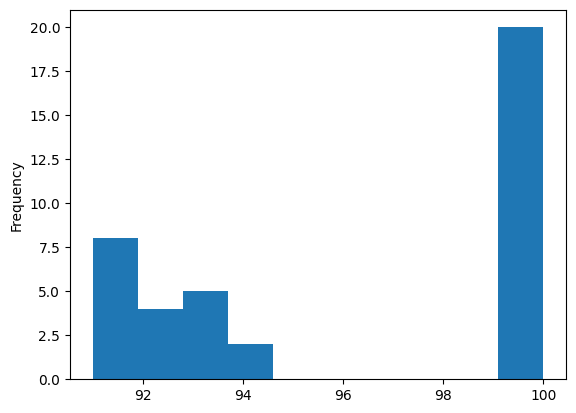

In [101]:
df.loc[df['Ratio Score'] > 90, "Ratio Score"].plot(kind='hist')